In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.stats as stats
import pylab
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.stats as stats
import pylab
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.graphics import tsaplots
from statsmodels.tsa.stattools import adfuller
import itertools 
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
engine1h = pd.read_csv(r'Engine3_1h.csv')
engine1h.head()

,Unnamed: 0,Date_time,THRM_EFF_BTU
0,0,01/01/2021 00:00,22.910171
1,1,01/01/2021 01:00,22.856912
2,2,01/01/2021 02:00,22.918531
3,3,01/01/2021 03:00,22.942700
4,4,01/01/2021 04:00,22.863096


In [5]:
engine1h.index = pd.to_datetime(engine1h['Date_time'])
engine1h.drop(columns='Date_time',inplace=True)
engine1h.drop(['Unnamed: 0'], axis=1, inplace=True)
engine1h.head()

,THRM_EFF_BTU
Date_time,
2021-01-01 00:00:00,22.910171
2021-01-01 01:00:00,22.856912
2021-01-01 02:00:00,22.918531
2021-01-01 03:00:00,22.942700
2021-01-01 04:00:00,22.863096


In [6]:
engine1h.describe()

,THRM_EFF_BTU
count,8761.000000
mean,27.110160
std,14.499906
min,0.000000
25%,21.868411
50%,33.087613
75%,37.552449
max,39.761882


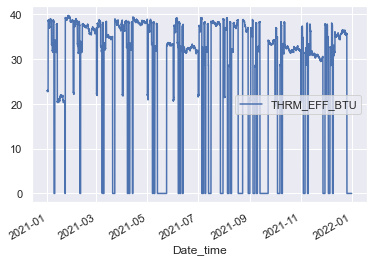

In [7]:
engine1h.plot();

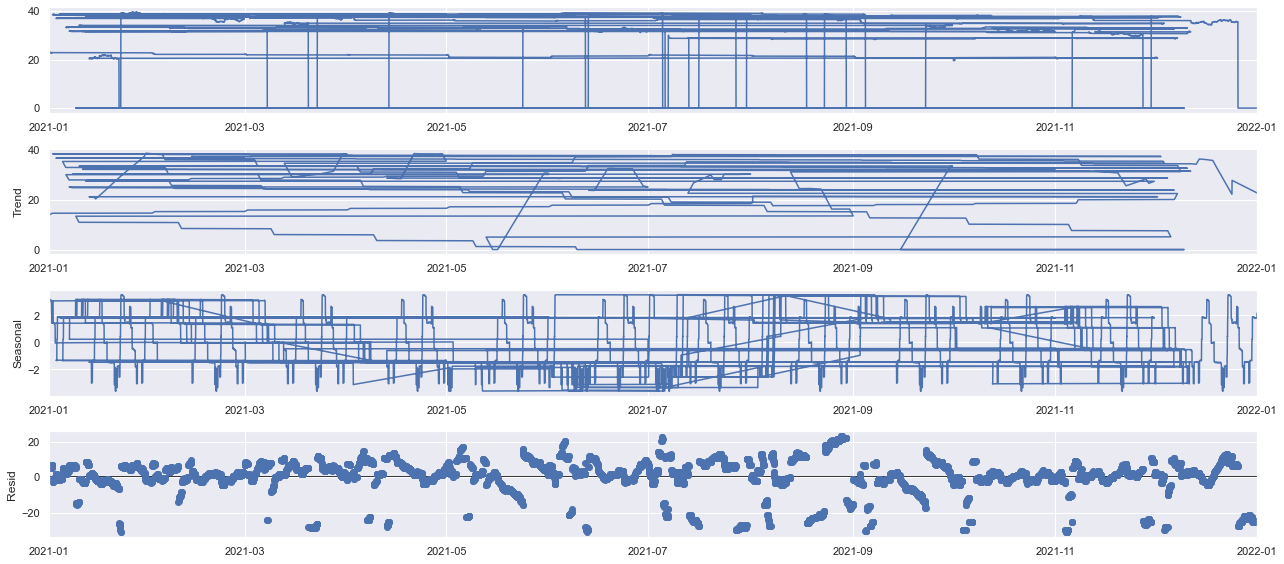

In [8]:
import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 18, 8
descomponer = sm.tsa.seasonal_decompose(engine1h, period=365, extrapolate_trend='freq')
#resplot = des.plot()
fig = descomponer.plot()
plt.show()

In [16]:
engine_dia = engine1h.resample('d').mean()
engine_dia

,THRM_EFF_BTU
Date_time,
2021-01-01,22.891202
2021-01-02,38.516979
2021-01-03,37.091051
2021-01-04,38.815453
2021-01-05,38.547450
...,...
2021-12-28,0.000000
2021-12-29,0.000000
2021-12-30,0.000000


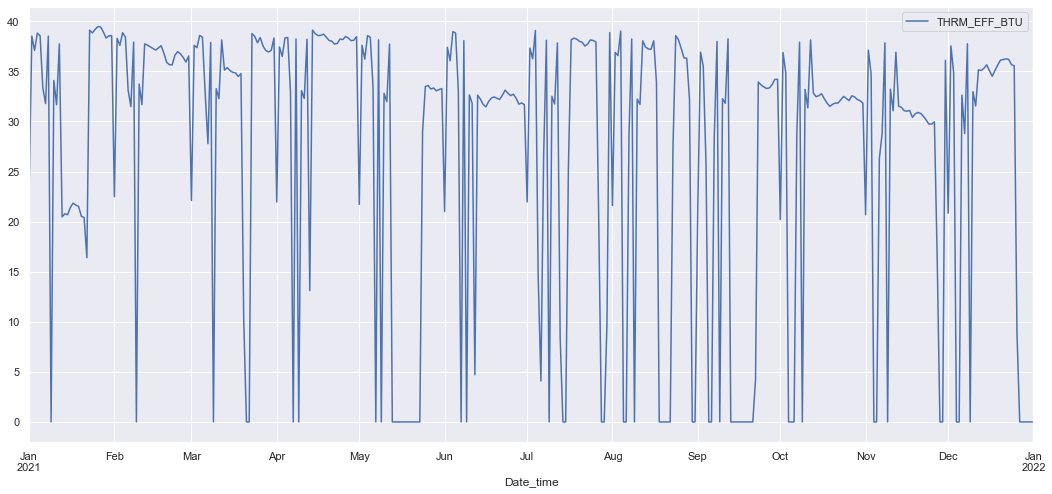

In [17]:
engine_dia.plot();

In [9]:
import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 18, 8
descomponer = sm.tsa.seasonal_decompose(engine_dia, period=48, extrapolate_trend='freq')
#resplot = des.plot()
fig = descomponer.plot()
plt.show()

NameError: name 'engine_dia' is not defined

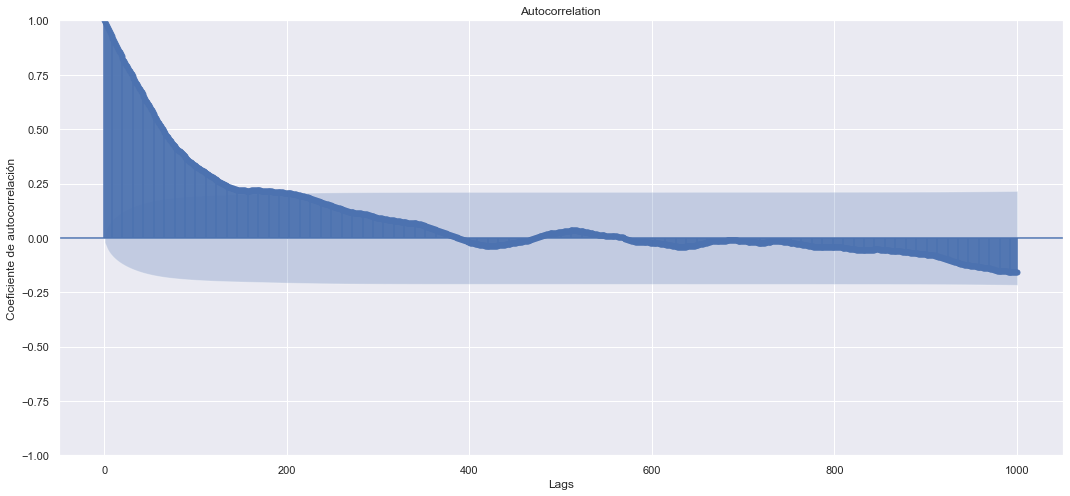

In [11]:
# Your code here:
from statsmodels.graphics import tsaplots
tsaplots.plot_acf(engine1h.values.squeeze(), lags=1000)
plt.xlabel('Lags')
plt.ylabel('Coeficiente de autocorrelación')
plt.show()

In [12]:
def viewing_stationarity(df, window=5):
  #Esta función genera un plot para una serie de tiempo con su media móvil y su desviación estándar.


    rolmean = df.rolling(window=window).mean()
    rolstd = df.rolling(window=window).std()

    fig = plt.figure(figsize=(10, 5))
    time_series = plt.plot(df, color='blue', label='original')
    mean = plt.plot(rolmean, color='red', label='media móvil')
    std = plt.plot(rolstd, color='green', label='desviación estándar móvil')
    plt.legend(loc='best')
    plt.show();

In [13]:
class Stationary:
    def __init__(self, significance=0.05):
        self.significance_level = significance
        self.pvalue = None
        self.is_stationary = None

    def ADF(self, values):
        result = adfuller(values, autolag='AIC')

        format_results = pd.Series(result[:4], 
                                    index=['Statistic', 'P-value',
                                          'Num of Lags', 'Observations'])
        for k,v in result[4].items():
              format_results[f'Critical Value {k}'] = v

        return format_results

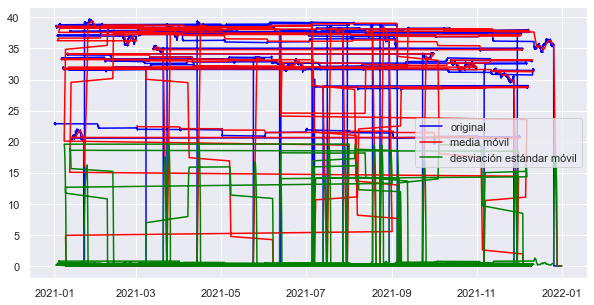

Statistic               -6.00590
P-value                  0.00000
Num of Lags              0.00000
Observations          8760.00000
Critical Value 1%       -3.43110
Critical Value 5%       -2.86187
Critical Value 10%      -2.56695
dtype: float64

In [15]:
viewing_stationarity(engine1h, window=60)
adf_test = Stationary()
adf_test.ADF(engine1h.values).round(5)

In [16]:
engine1h_copia = engine1h
engine1h_copia['THRM_EFF_BTU_shift'] = engine1h_copia['THRM_EFF_BTU'].shift(1) # bits = n, bits_shift1 = n-1
engine1h_copia.head()

,THRM_EFF_BTU,THRM_EFF_BTU_shift
Date_time,,
2021-01-01 00:00:00,22.910171,NaN
2021-01-01 01:00:00,22.856912,22.910171
2021-01-01 02:00:00,22.918531,22.856912
2021-01-01 03:00:00,22.942700,22.918531
2021-01-01 04:00:00,22.863096,22.942700


In [17]:
engine1h_copia['THRM_EFF_BTU_diff'] = engine1h_copia['THRM_EFF_BTU'] - engine1h_copia['THRM_EFF_BTU_shift']
engine1h_copia.head()

,THRM_EFF_BTU,THRM_EFF_BTU_shift,THRM_EFF_BTU_diff
Date_time,,,
2021-01-01 00:00:00,22.910171,NaN,NaN
2021-01-01 01:00:00,22.856912,22.910171,-0.053259
2021-01-01 02:00:00,22.918531,22.856912,0.061619
2021-01-01 03:00:00,22.942700,22.918531,0.024169
2021-01-01 04:00:00,22.863096,22.942700,-0.079604


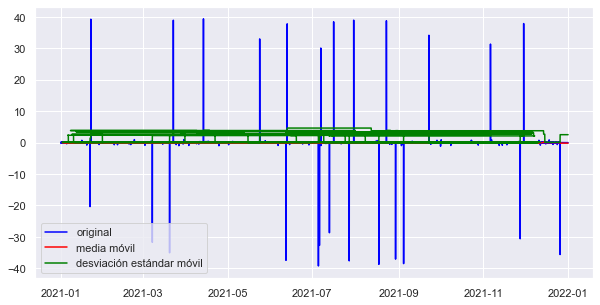

Statistic              -93.616870
P-value                  0.000000
Num of Lags              0.000000
Observations          8759.000000
Critical Value 1%       -3.431097
Critical Value 5%       -2.861870
Critical Value 10%      -2.566946
dtype: float64

In [18]:
viewing_stationarity(engine1h_copia['THRM_EFF_BTU_diff'].dropna(), window=200)
adf_test = Stationary()
adf_test.ADF(engine1h_copia['THRM_EFF_BTU_diff'].dropna().values).round(6)

In [19]:
model=sm.tsa.arima.ARIMA(engine1h_copia['THRM_EFF_BTU'],order=(1,1,1))
history=model.fit()
history.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           THRM_EFF_BTU   No. Observations:                 8761
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -18052.621
Date:                Sat, 12 Mar 2022   AIC                          36111.241
Time:                        18:53:54   BIC                          36132.475
Sample:                             0   HQIC                         36118.476
                               - 8761                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0002   1030.286  -1.76e-07      1.000   -2019.323    2019.323
ma.L1         -0.0002   1030.328  -2.16e-07      1.000   -2019.406    2019.405
sigma2         3.6100      0.004    873.425      0.000       3.602       3.618
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          48376315.67
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                             0.81
Prob(H) (two-sided):                  0.71   Kurtosis:                       367.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
engine1h_copia.head()

,THRM_EFF_BTU,THRM_EFF_BTU_shift,THRM_EFF_BTU_diff
Date_time,,,
2021-01-01 00:00:00,22.910171,NaN,NaN
2021-01-01 01:00:00,22.856912,22.910171,-0.053259
2021-01-01 02:00:00,22.918531,22.856912,0.061619
2021-01-01 03:00:00,22.942700,22.918531,0.024169
2021-01-01 04:00:00,22.863096,22.942700,-0.079604


In [21]:
engine1h_copia.tail()

,THRM_EFF_BTU,THRM_EFF_BTU_shift,THRM_EFF_BTU_diff
Date_time,,,
2021-12-31 20:00:00,0.0,0.0,0.0
2021-12-31 21:00:00,0.0,0.0,0.0
2021-12-31 22:00:00,0.0,0.0,0.0
2021-12-31 23:00:00,0.0,0.0,0.0
2022-01-01 00:00:00,0.0,0.0,0.0


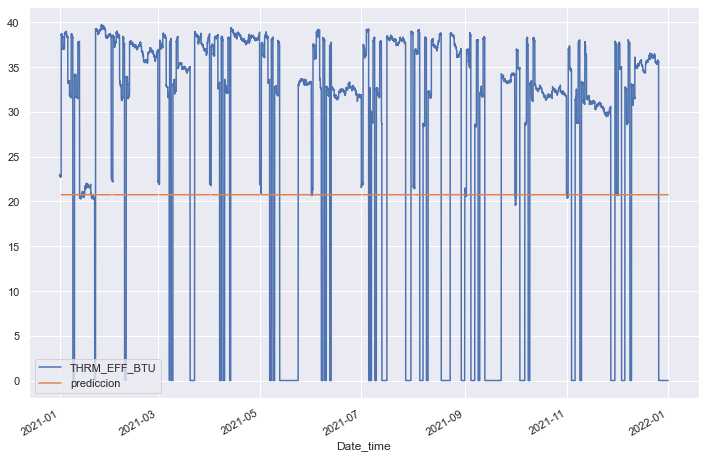

In [35]:
engine1h_copia['prediccion']=history.predict(start="2021-12-01 00:00:00",end="2022-01-01 00:00:00",dynamic=True)
engine1h_copia[['THRM_EFF_BTU','prediccion']].plot(figsize=(12,8));

In [36]:
model=sm.tsa.arima.ARIMA(engine1h_copia['THRM_EFF_BTU_diff'].dropna(),order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      THRM_EFF_BTU_diff   No. Observations:                 8760
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -18055.591
Date:                Sat, 12 Mar 2022   AIC                          36117.183
Time:                        19:08:43   BIC                          36138.416
Sample:                             0   HQIC                         36124.418
                               - 8760                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0003      0.356     -0.001      0.999      -0.699       0.698
ma.L1         -1.0000      0.066    -15.140      0.000      -1.129      -0.871
sigma2         3.6108      0.238     15.166      0.000       3.144       4.077
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          48362907.51
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                             0.82
Prob(H) (two-sided):                  0.71   Kurtosis:                       367.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

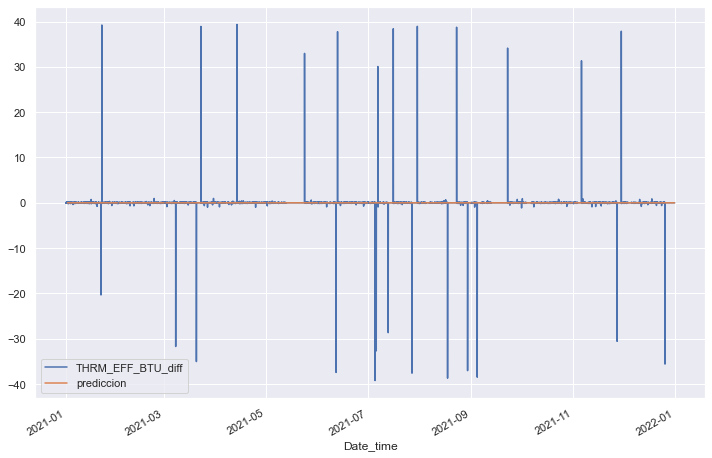

In [37]:
engine1h_copia['prediccion']=model_fit.predict(start="2021-12-01 00:00:00",end="2022-01-01 00:00:00",dynamic=True)
engine1h_copia[['THRM_EFF_BTU_diff','prediccion']].plot(figsize=(12,8));

In [39]:
model=sm.tsa.statespace.SARIMAX(engine1h_copia['THRM_EFF_BTU'],order=(1, 1, 1),seasonal_order=(1,1,1,120))
results=model.fit()
results.summary()

KeyboardInterrupt: 

<AxesSubplot:xlabel='Date_time'>

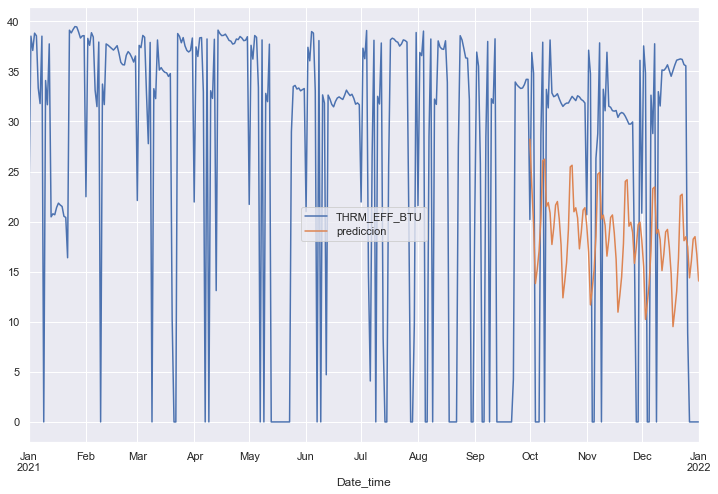

In [39]:
engine1h_copia['prediccion']=results.predict(start="2021-10-01 00:00:00",end="2022-01-01 00:00:00",dynamic=True)
engine1h_copia[['THRM_EFF_BTU','prediccion']].plot(figsize=(12,8))

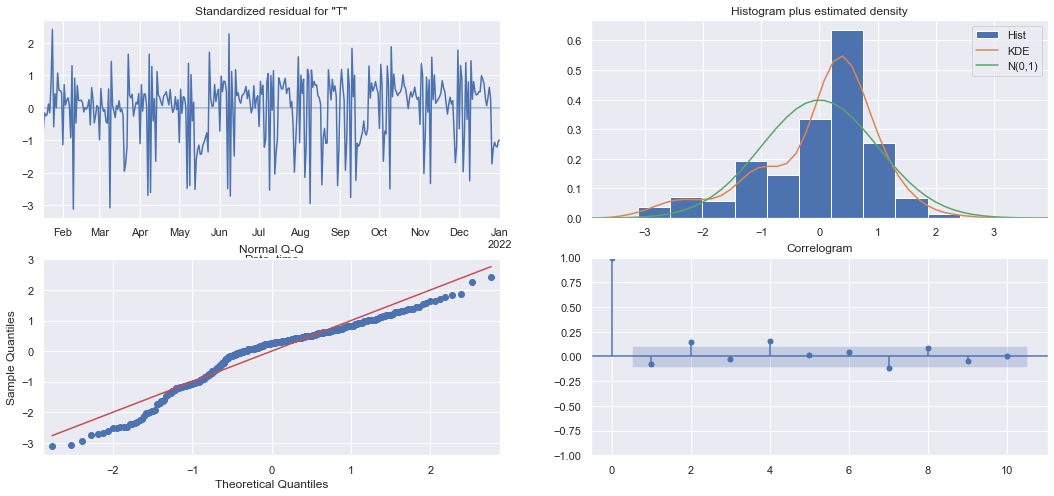

In [40]:
results.plot_diagnostics()
plt.show()

# Prediccion

In [41]:
engine_dia.shape[0] * 0.80

292.8

In [42]:
engine_dia.reset_index().iloc[292, 0]

Timestamp('2021-10-20 00:00:00')

In [43]:
start = engine_dia.reset_index().iloc[292, 0]
end = engine_dia.reset_index().iloc[-1, 0]
start, end

(Timestamp('2021-10-20 00:00:00'), Timestamp('2022-01-01 00:00:00'))

In [52]:
pred = results.predict(start=start, end=end)
pred_ci = results.get_prediction(start=start, end=end).conf_int()

df_pred = pd.DataFrame(pred, index=engine_dia.iloc[292:].index, columns=['THRM_EFF_BTU'])

In [53]:
df_pred.head()

,THRM_EFF_BTU
Date_time,
2021-10-20,NaN
2021-10-21,NaN
2021-10-22,NaN
2021-10-23,NaN
2021-10-24,NaN


In [54]:
pred_ci.head()

,lower THRM_EFF_BTU,upper THRM_EFF_BTU
Date_time,,
2021-10-20,-1.643674,47.855466
2021-10-21,-0.312077,49.185071
2021-10-22,3.236670,52.731954
2021-10-23,7.771879,57.265505
2021-10-24,3.972323,53.464656


In [57]:
df_prediction = pd.concat([df_pred, pred_ci], axis=1)
df_prediction.head()

,THRM_EFF_BTU,lower THRM_EFF_BTU,upper THRM_EFF_BTU
Date_time,,,
2021-10-20,NaN,-1.643674,47.855466
2021-10-21,NaN,-0.312077,49.185071
2021-10-22,NaN,3.236670,52.731954
2021-10-23,NaN,7.771879,57.265505
2021-10-24,NaN,3.972323,53.464656


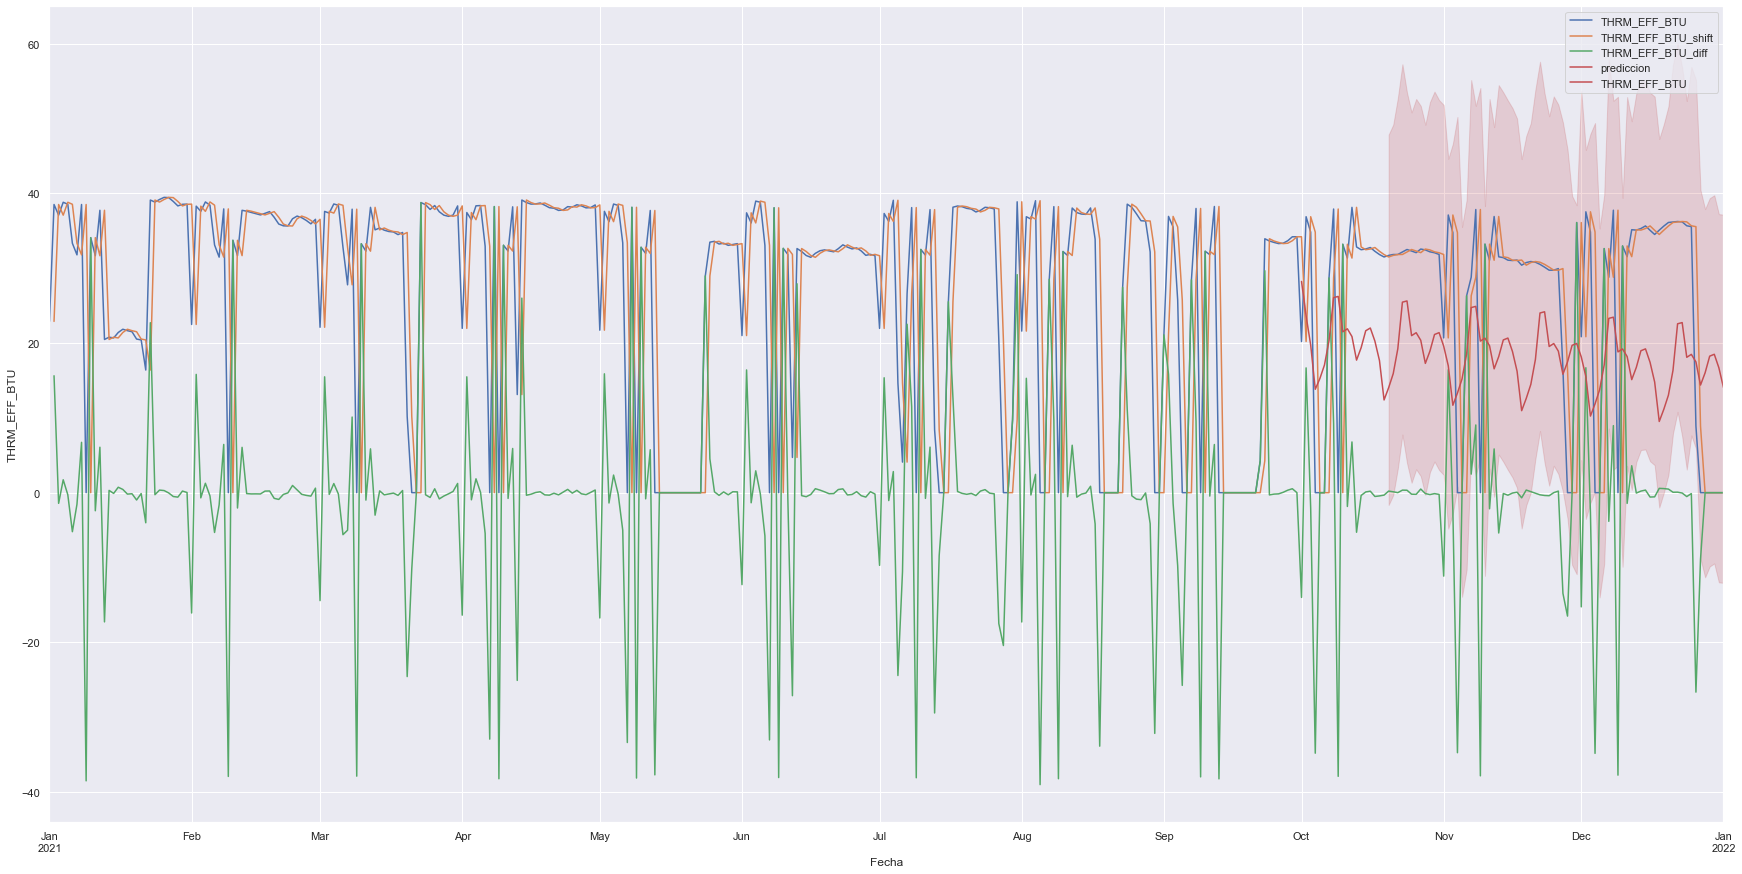

In [58]:
rcParams['figure.figsize'] = 30, 15
ax = engine_dia.plot(label='observed')
df_prediction['THRM_EFF_BTU'].plot(c='r')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.2)

ax.set_xlabel('Fecha')
ax.set_ylabel('THRM_EFF_BTU')
plt.legend()

plt.show()

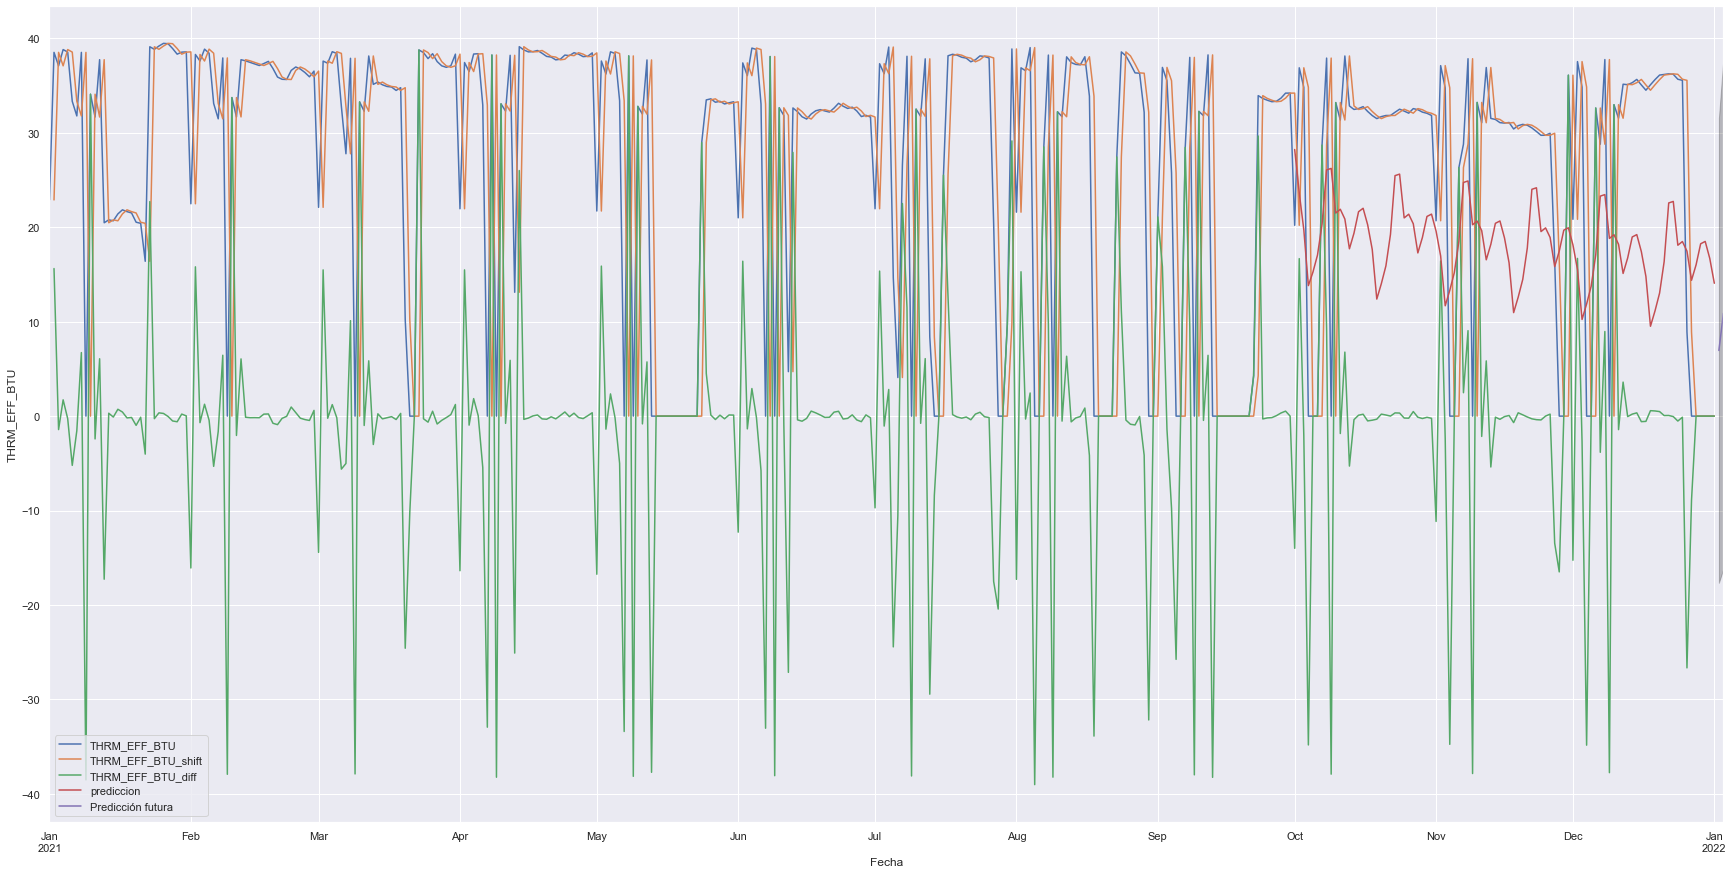

In [59]:
rcParams['figure.figsize'] = 30, 15

pred_uc = results.get_forecast(steps=2)
pred_ci = pred_uc.conf_int()
ax = engine_dia.plot(label='Observado', figsize=(30, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Predicción futura')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Fecha')
ax.set_ylabel('THRM_EFF_BTU')
plt.legend()
plt.show()